In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/barneyjs/.virtualenvs/master/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

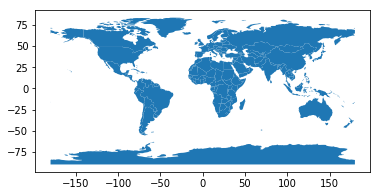

In [3]:
world.plot()

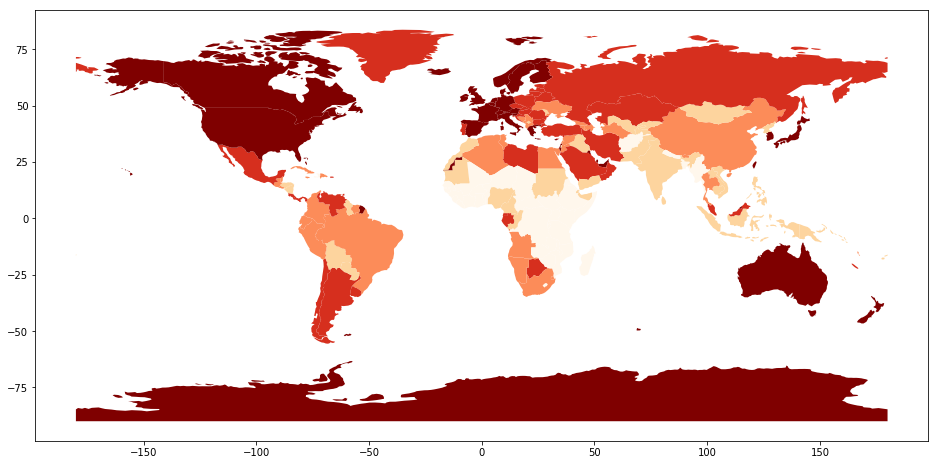

In [4]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));

In [5]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [153]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

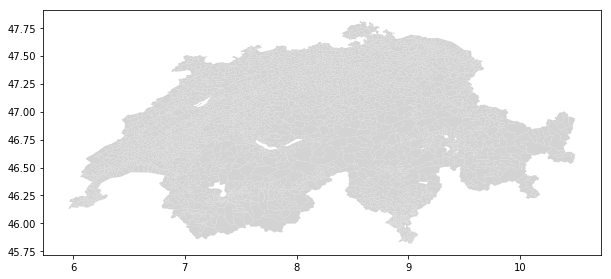

In [154]:
ch.plot(figsize=(10,10), color='lightgrey')
plt.savefig('switzerland.pdf')

In [155]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row.Lng, row.Lat)
df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [156]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))

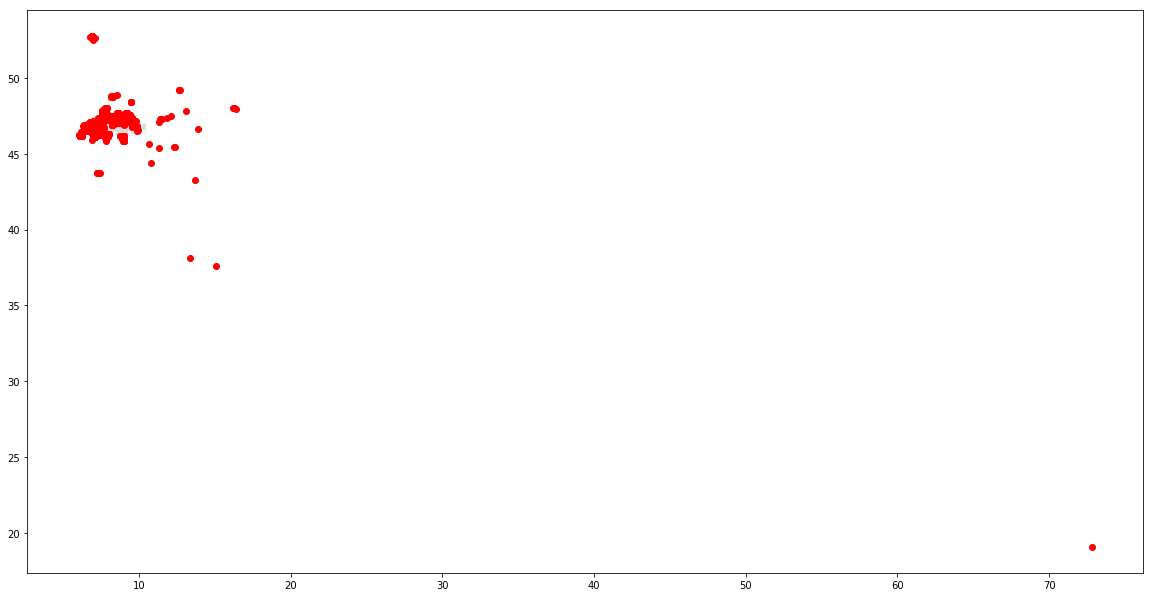

In [157]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
italrests.plot(ax=ax, color='red')

In [158]:
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

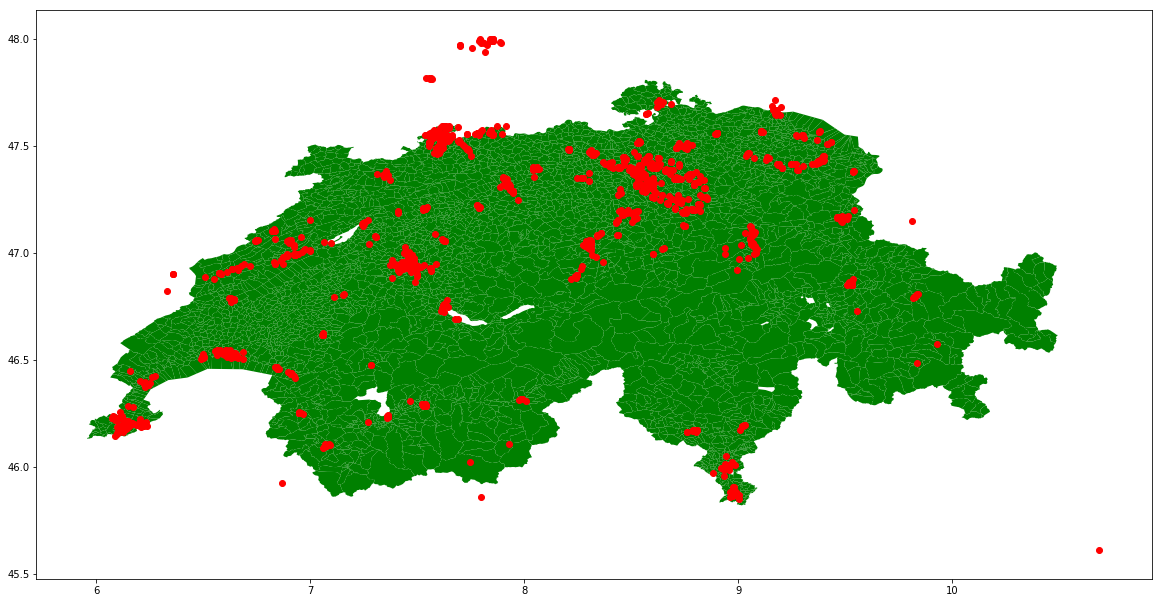

In [159]:
ax = ch.plot(figsize=(20,20), color='green')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [160]:
ch.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [161]:
ch = ch.dropna()

In [162]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

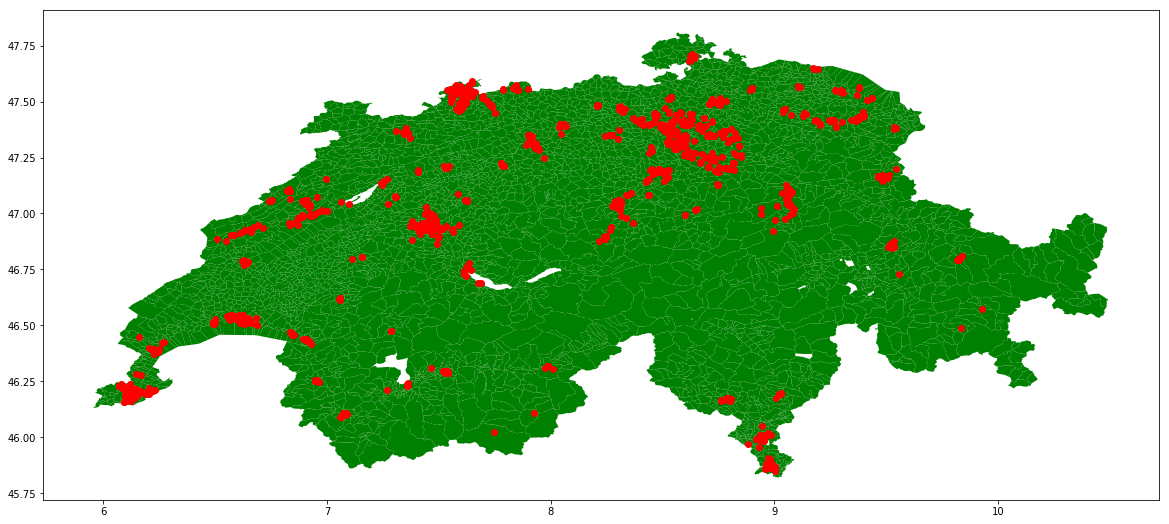

In [163]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

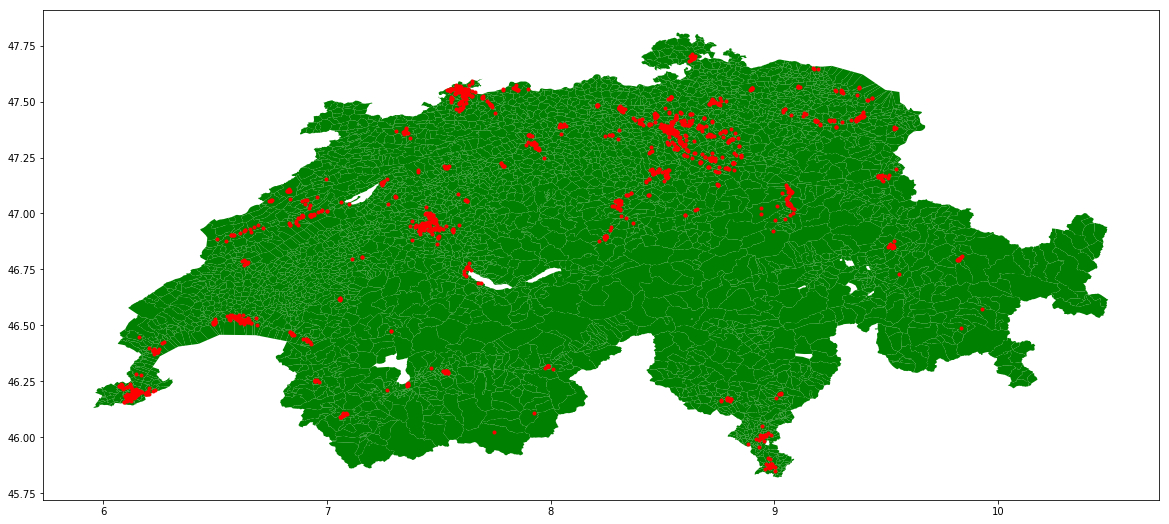

In [164]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red', marker='.')

# Schauen wir uns Zürich an

In [165]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [166]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [167]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

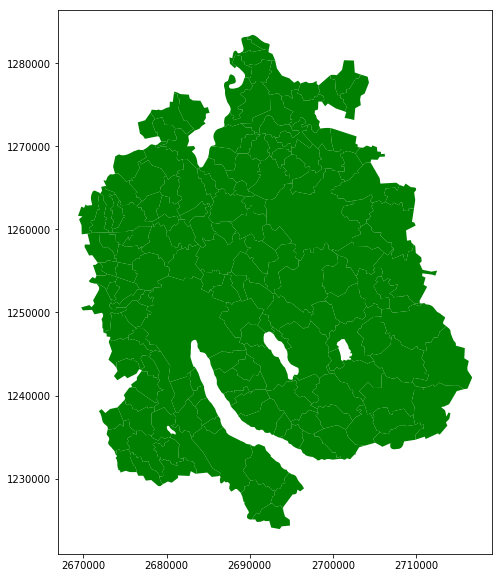

In [168]:
zh.plot(figsize=(10,10), color='green')


In [169]:
zh.crs = {'init' :'epsg:4326'}

In [170]:
zh.crs

{'init': 'epsg:4326'}

In [ ]:
from shapely.geometry import Point, Polygon

In [174]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [177]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

{'init': 'epsg:3857'}

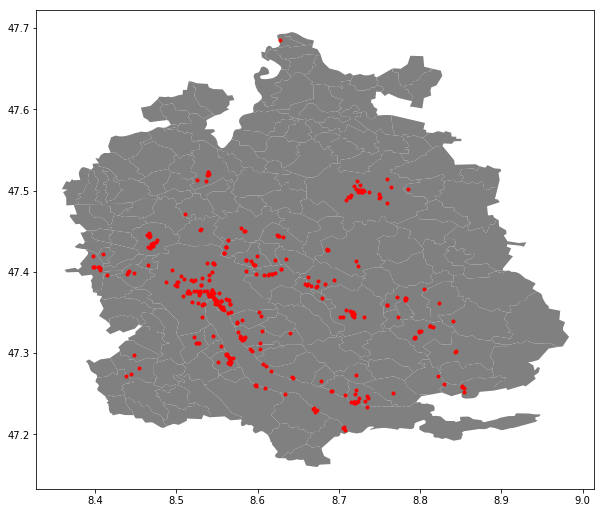

In [193]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")